In [1]:
# importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

C:\Users\roysi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('previous_application.csv')
df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## Removing unwanted columns from the datset

In [3]:
df.drop(df.loc[:,'WEEKDAY_APPR_PROCESS_START': 'RATE_INTEREST_PRIVILEGED'].columns, axis = 1, inplace = True)

In [4]:
df.drop(df.loc[:,'PRODUCT_COMBINATION': 'DAYS_TERMINATION'].columns, axis = 1, inplace = True)

In [5]:
df.shape

(1670214, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   SK_ID_PREV                 1670214 non-null  int64  
 1   SK_ID_CURR                 1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE         1670214 non-null  object 
 3   AMT_ANNUITY                1297979 non-null  float64
 4   AMT_APPLICATION            1670214 non-null  float64
 5   AMT_CREDIT                 1670213 non-null  float64
 6   AMT_DOWN_PAYMENT           774370 non-null   float64
 7   AMT_GOODS_PRICE            1284699 non-null  float64
 8   NAME_CASH_LOAN_PURPOSE     1670214 non-null  object 
 9   NAME_CONTRACT_STATUS       1670214 non-null  object 
 10  DAYS_DECISION              1670214 non-null  int64  
 11  NAME_PAYMENT_TYPE          1670214 non-null  object 
 12  CODE_REJECT_REASON         1670214 non-null  object 
 13  NAME_TYPE_SU

## NULL Value check

In [7]:
round(df.isnull().sum()/len(df)*100, 2).sort_values(ascending = False)

AMT_DOWN_PAYMENT             53.64
NAME_TYPE_SUITE              49.12
NFLAG_INSURED_ON_APPROVAL    40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
NAME_CLIENT_TYPE              0.00
NAME_YIELD_GROUP              0.00
NAME_SELLER_INDUSTRY          0.00
SELLERPLACE_AREA              0.00
CHANNEL_TYPE                  0.00
NAME_PRODUCT_TYPE             0.00
NAME_PORTFOLIO                0.00
NAME_GOODS_CATEGORY           0.00
SK_ID_PREV                    0.00
SK_ID_CURR                    0.00
NAME_PAYMENT_TYPE             0.00
DAYS_DECISION                 0.00
NAME_CONTRACT_STATUS          0.00
NAME_CASH_LOAN_PURPOSE        0.00
AMT_CREDIT                    0.00
AMT_APPLICATION               0.00
NAME_CONTRACT_TYPE            0.00
CODE_REJECT_REASON            0.00
dtype: float64

So we will deleting columns which have NULL values above 30%

In [8]:
df.drop(columns = ['AMT_DOWN_PAYMENT', 'NAME_TYPE_SUITE', 'NFLAG_INSURED_ON_APPROVAL'], inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 21 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

As the null rows can't be estimated hence dropping those rows will be a better idea.

In [10]:
df = df[~(df.AMT_GOODS_PRICE.isnull())]

In [11]:
df = df[~(df.AMT_ANNUITY.isnull())]

In [12]:
df = df[~(df.CNT_PAYMENT.isnull())]

In [13]:
df.shape

(1246320, 21)

In [14]:
df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high


## Duplicated Value

In [15]:
df[df.duplicated()]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP


## Analysing Columns

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1246320 entries, 0 to 1670213
Data columns (total 21 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1246320 non-null  int64  
 1   SK_ID_CURR              1246320 non-null  int64  
 2   NAME_CONTRACT_TYPE      1246320 non-null  object 
 3   AMT_ANNUITY             1246320 non-null  float64
 4   AMT_APPLICATION         1246320 non-null  float64
 5   AMT_CREDIT              1246320 non-null  float64
 6   AMT_GOODS_PRICE         1246320 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1246320 non-null  object 
 8   NAME_CONTRACT_STATUS    1246320 non-null  object 
 9   DAYS_DECISION           1246320 non-null  int64  
 10  NAME_PAYMENT_TYPE       1246320 non-null  object 
 11  CODE_REJECT_REASON      1246320 non-null  object 
 12  NAME_CLIENT_TYPE        1246320 non-null  object 
 13  NAME_GOODS_CATEGORY     1246320 non-null  object 
 14  NA

- `NAME_CONTRACT_TYPE`

In [17]:
df.NAME_CONTRACT_TYPE.value_counts()

Consumer loans     691432
Cash loans         461563
Revolving loans     93325
Name: NAME_CONTRACT_TYPE, dtype: int64

**Consumer Loan**: These loans are typically unsecured, which means they are not backed by collateral such as house or a car. Instead, they rely on the borrower's creditworthiness, income and ability to repay the loan. Lenders assess the borrower's credit history, income level and debt to income ratio to determine whether they qualify for the loan and at what interest rate.

**Cash Loan**: Cash Loans are usually unsecured, meaning they don't require collateral. Instead, lenders base their decision on the borrower's income and ability to repay the loan. The loan amount is typically a portion of the borrower's regular income.
Key features of Cash Loans:
- Short Term
- Small Loan amounts
- Quick approval and funding
- Higher interest rates
- Repayment upon next paycheck

Its important to exercise caution when considering cash loans because of their higheg interest rates and potential for creating a cycle of debt. Borrowers should carefully evaluate their financial situation, explore alternative options and borrow reponsibly to avoid any negetive consequences.

**Revolving Loans**: A revolving loan, also known as a revolving credit or line of credit, is a type of loan that allows borrowers to access funds up to a predetermined credit limit. Common examples of revolving loans include credit cards and lines of credit offered by financial institutions. Revolving loans provider borrowers with ongoing access to funds, offereing convenience and flexibility. However, it is important to manage revolving credit responsibility and avoid excessive borrowing, as high balances and revolving can lead to financial challenges and interest costs over time.


- `NAME_CASH_LOAN_PURPOSE`

In [18]:
df.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 784757
XNA                                 392191
Repairs                              23698
Other                                15499
Urgent needs                          8405
Buying a used car                     2872
Building a house or an annex          2693
Everyday expenses                     2394
Medicine                              2167
Payments on other loans               1926
Education                             1567
Journey                               1235
Purchase of electronic equipment      1055
Buying a new car                      1006
Wedding / gift / holiday               957
Buying a home                          865
Car repairs                            797
Furniture                              748
Buying a holiday home / land           533
Business development                   425
Gasification / water supply            299
Buying a garage                        136
Hobby                                   55
Money for a

- `NAME_CONTRACT_STATUS`

In [19]:
df.NAME_CONTRACT_STATUS.value_counts()

Approved        993938
Refused         240969
Canceled         10503
Unused offer       910
Name: NAME_CONTRACT_STATUS, dtype: int64

In [20]:
df[df.NAME_CONTRACT_STATUS == "Unused offer"]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP
1113,2131996,195480,Consumer loans,13692.105,120550.5,120550.5,120550.5,XAP,Unused offer,-56,Cash through the bank,CLIENT,Repeater,Mobile,POS,XNA,Country-wide,20,Connectivity,10.0,low_normal
1538,1166585,152289,Consumer loans,14467.500,127377.0,127377.0,127377.0,XAP,Unused offer,-268,Cash through the bank,CLIENT,Repeater,Mobile,POS,XNA,Country-wide,45,Connectivity,10.0,low_normal
2262,2235945,241558,Consumer loans,14845.680,130707.0,130707.0,130707.0,XAP,Unused offer,-205,Cash through the bank,CLIENT,Repeater,Mobile,POS,XNA,Country-wide,50,Connectivity,10.0,low_normal
5573,2067081,146539,Consumer loans,3459.195,30456.0,30456.0,30456.0,XAP,Unused offer,-146,Cash through the bank,CLIENT,Repeater,Mobile,POS,XNA,Country-wide,65,Connectivity,10.0,low_normal
6073,2710661,163054,Consumer loans,14676.075,145408.5,145408.5,145408.5,XAP,Unused offer,-194,Cash through the bank,CLIENT,Repeater,Mobile,POS,XNA,Country-wide,20,Connectivity,12.0,middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663093,2529324,308240,Consumer loans,5794.965,51021.0,51021.0,51021.0,XAP,Unused offer,-211,Cash through the bank,CLIENT,Repeater,Computers,POS,XNA,Country-wide,40,Connectivity,10.0,low_normal
1665285,1457330,294170,Consumer loans,32816.700,215820.0,269896.5,215820.0,XAP,Unused offer,-264,Cash through the bank,CLIENT,Repeater,Mobile,POS,XNA,Country-wide,19,Connectivity,12.0,high
1667105,1387803,390254,Consumer loans,7181.190,58455.0,58455.0,58455.0,XAP,Unused offer,-258,Cash through the bank,CLIENT,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,10.0,middle
1667226,2182959,246321,Consumer loans,14440.410,127138.5,127138.5,127138.5,XAP,Unused offer,-419,Cash through the bank,CLIENT,Refreshed,Mobile,POS,XNA,Country-wide,45,Connectivity,10.0,low_normal


- `NAME_PAYMENT_TYPE`

In [21]:
df.NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        996935
XNA                                          240190
Non-cash from your account                     8125
Cashless from the account of the employer      1070
Name: NAME_PAYMENT_TYPE, dtype: int64

- `CODE_REJECT_REASON`

In [22]:
df.CODE_REJECT_REASON.value_counts()

XAP       1004433
HC         142090
LIMIT       50069
SCO         34996
SCOFR        8175
VERIF        3348
XNA          2276
CLIENT        910
SYSTEM         23
Name: CODE_REJECT_REASON, dtype: int64

- `NAME_CLIENT_TYPE`

In [23]:
df.NAME_CLIENT_TYPE.value_counts()

Repeater     843841
New          294548
Refreshed    107030
XNA             901
Name: NAME_CLIENT_TYPE, dtype: int64

- `NAME_GOODS_CATEGORY`

In [24]:
df.NAME_GOODS_CATEGORY.value_counts()

XNA                         563260
Mobile                      200334
Consumer Electronics        119981
Computers                    99988
Audio/Video                  97775
Furniture                    53287
Construction Materials       24866
Clothing and Accessories     23408
Photo / Cinema Equipment     23153
Auto Accessories              7153
Jewelry                       6260
Homewares                     4998
Medical Supplies              3841
Vehicles                      3335
Sport and Leisure             2949
Gardening                     2653
Other                         2554
Office Appliances             2295
Tourism                       1651
Medicine                      1550
Direct Sales                   445
Fitness                        209
Additional Service             128
Education                      107
Weapon                          76
Insurance                       62
Animals                          1
House Construction               1
Name: NAME_GOODS_CAT

- `NAME_PORTFOLIO`

In [25]:
df.NAME_PORTFOLIO.value_counts()

POS      691007
Cash     461563
Cards     93325
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

- `NAME_PRODUCT_TYPE`

In [26]:
df.NAME_PRODUCT_TYPE.value_counts()

XNA        691432
x-sell     404628
walk-in    150260
Name: NAME_PRODUCT_TYPE, dtype: int64

- `CHANNEL_TYPE`

In [27]:
df.CHANNEL_TYPE.value_counts()

Country-wide                  447805
Credit and cash offices       396237
Stone                         207693
Regional / Local              105976
AP+ (Cash loan)                47462
Contact center                 34692
Channel of corporate sales      6003
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64

- `NAME_SELLER_INDUSTRY`

In [28]:
df.NAME_SELLER_INDUSTRY.value_counts()

XNA                     486013
Consumer electronics    384172
Connectivity            237491
Furniture                57056
Construction             29583
Clothing                 23794
Industry                 19021
Auto technology           4972
Jewelry                   2708
MLM partners               997
Tourism                    513
Name: NAME_SELLER_INDUSTRY, dtype: int64

- `NAME_YIELD_GROUP`

In [29]:
df.NAME_YIELD_GROUP.value_counts()

middle        385531
high          353328
low_normal    322095
XNA            93325
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64

In [30]:
df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high


In [31]:
df.drop(columns = ['NAME_SELLER_INDUSTRY','NAME_PRODUCT_TYPE', 'SELLERPLACE_AREA'], inplace = True)

<Figure size 2160x1800 with 0 Axes>

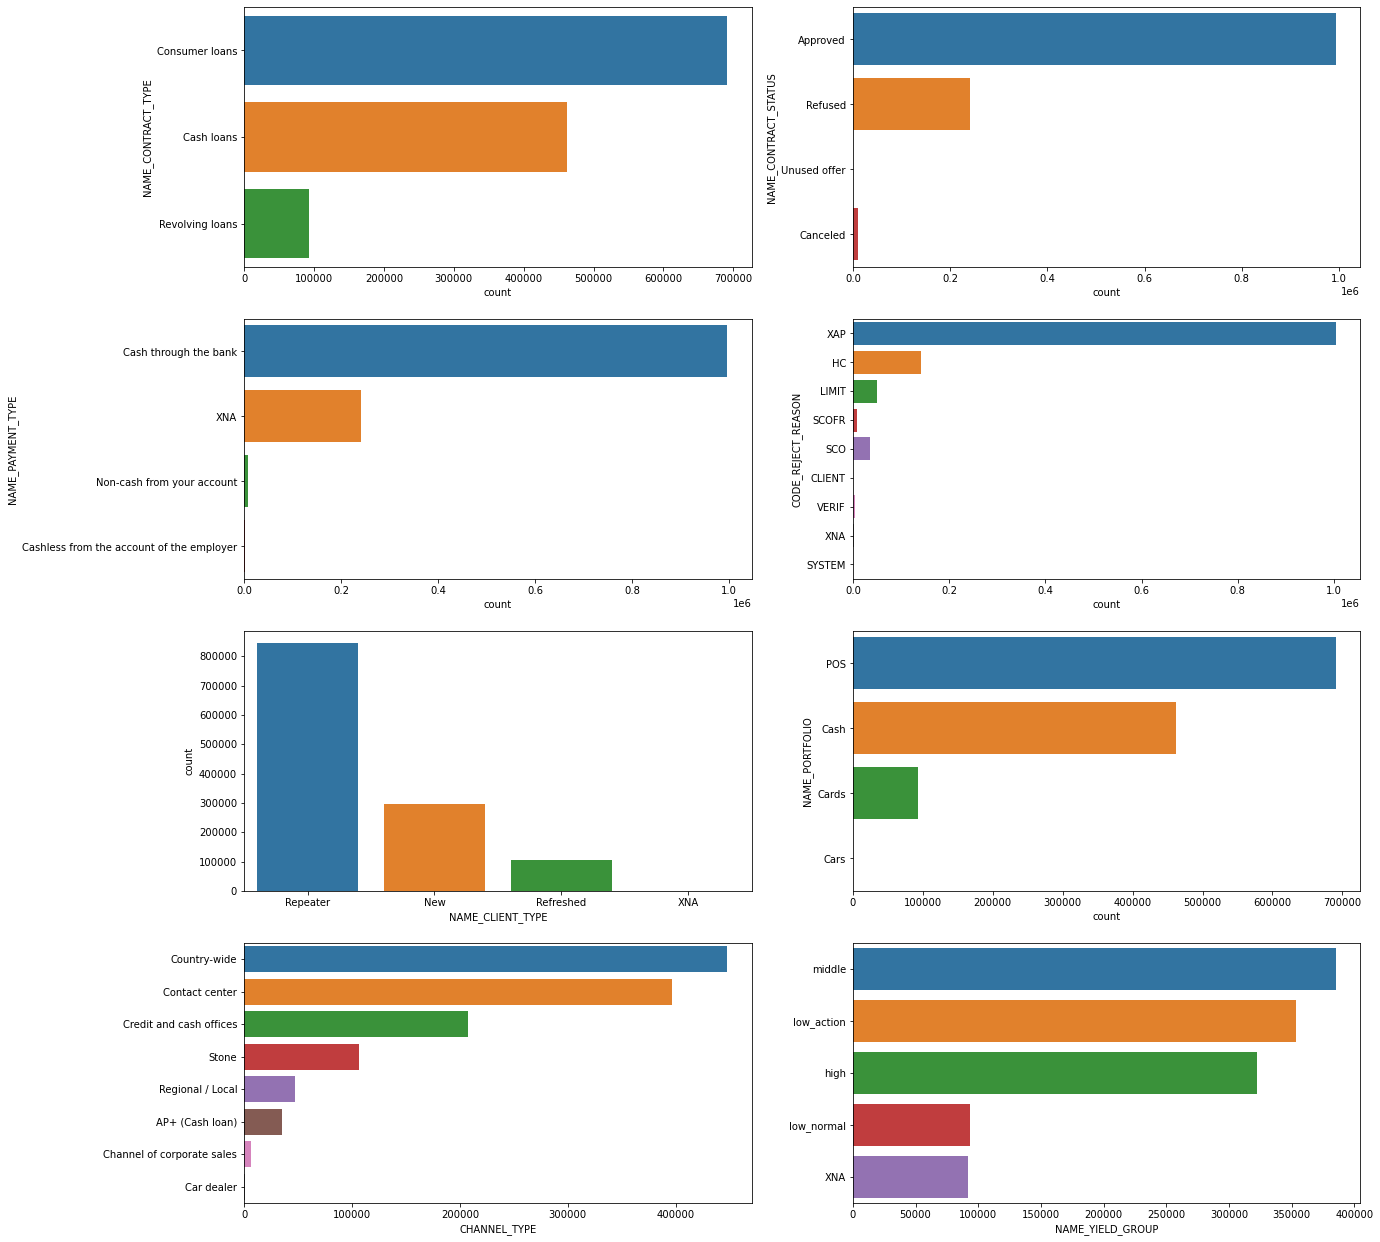

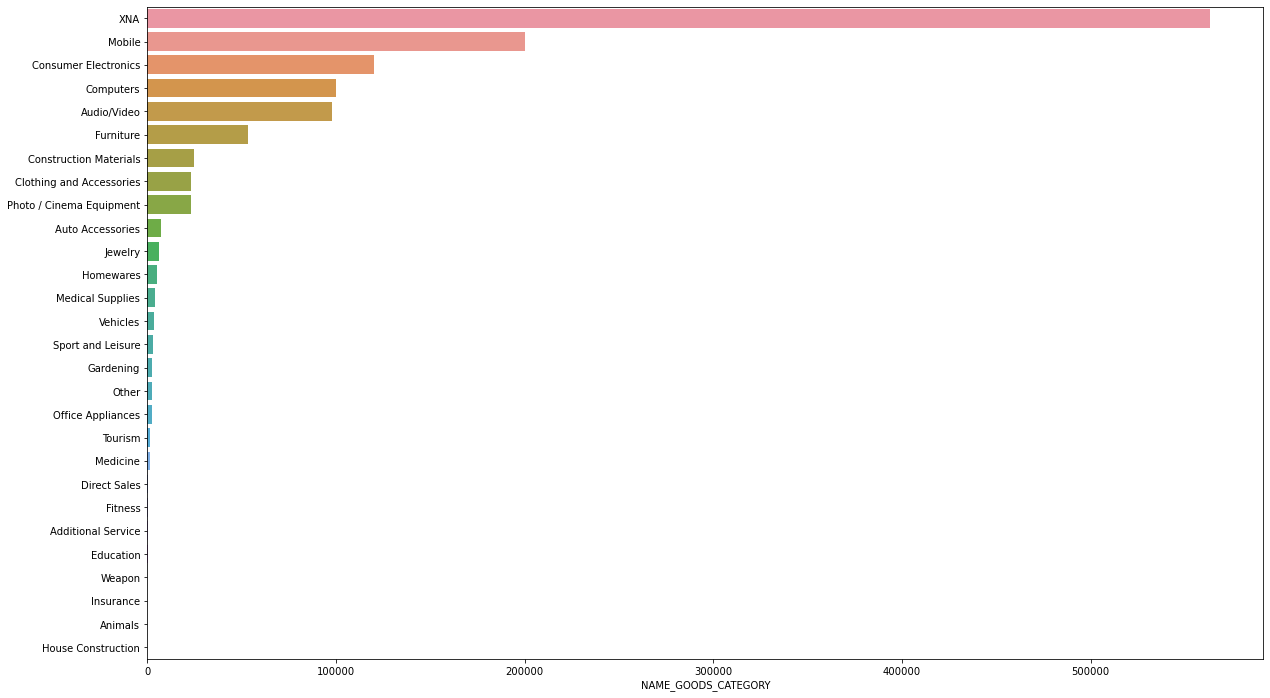

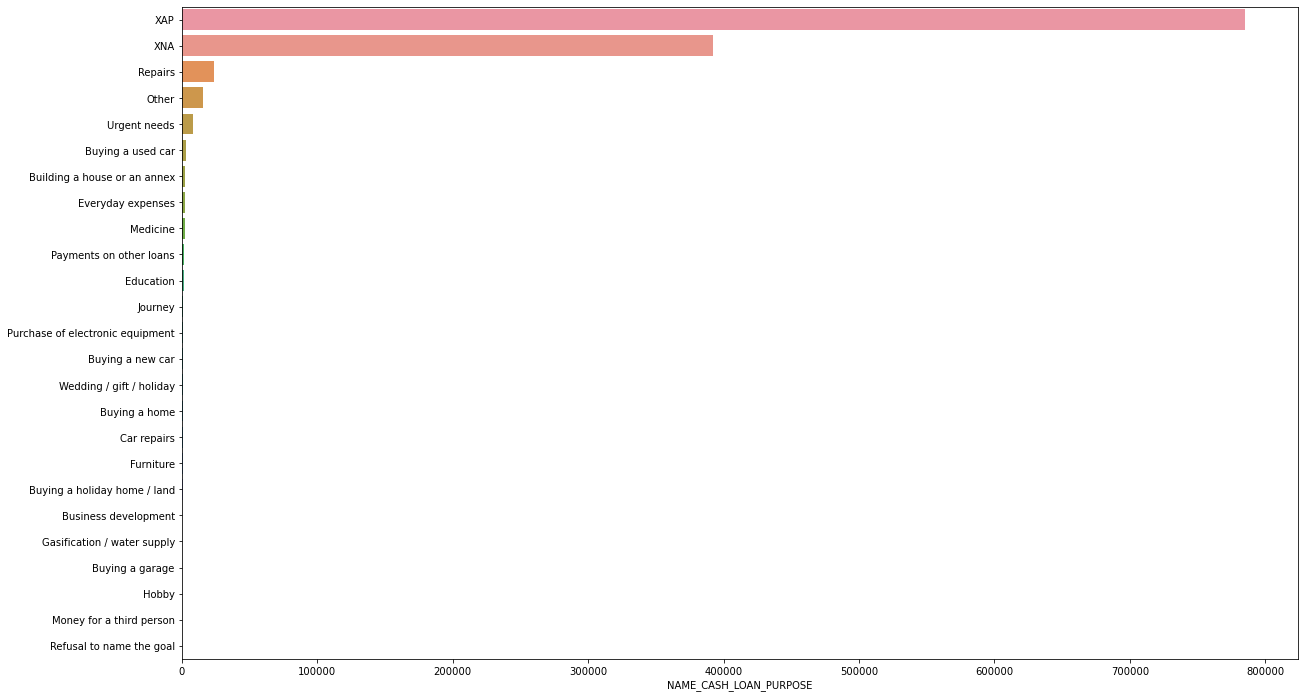

In [32]:
plt.figure(figsize = (30, 25))
plt.subplots_adjust(left=0,
                    bottom=0.05,
                    right=0.6,
                    top=0.9,
                    wspace=0.5,
                    hspace=0.5)

fig, axes = plt.subplots(4, 2, figsize=(20, 22))

sns.countplot(y = df.NAME_CONTRACT_TYPE,
               ax = axes[0, 0])

sns.countplot(y = df["NAME_CONTRACT_STATUS"],
            ax = axes[0, 1])

sns.countplot(y = df.NAME_PAYMENT_TYPE,
                 ax = axes[1, 0])

# sns.countplot(y = df.NAME_CONTRACT_STATUS,
#              ax = axes[1, 1])

sns.countplot(y = df.CODE_REJECT_REASON,
              ax = axes[1, 1])

sns.countplot(x = df.NAME_CLIENT_TYPE,
              ax = axes[2, 0])

sns.countplot(y = df.NAME_PORTFOLIO, 
              ax = axes[2, 1])

sns.barplot(y = df.CHANNEL_TYPE.unique(),
              x = df.CHANNEL_TYPE.value_counts(),
              ax = axes[3, 0])


sns.barplot(y = df.NAME_YIELD_GROUP.unique(),
              x = df.NAME_YIELD_GROUP.value_counts(),
              ax = axes[3, 1])

fig, axes = plt.subplots(1, 1, figsize=(20, 12))

sns.barplot(y = df.NAME_GOODS_CATEGORY.value_counts().index,
           x = df.NAME_GOODS_CATEGORY.value_counts())


fig, axes = plt.subplots(1, 1, figsize=(20, 12))

sns.barplot(y = df.NAME_CASH_LOAN_PURPOSE.value_counts().index,
           x = df.NAME_CASH_LOAN_PURPOSE.value_counts())


plt.show()

- **Contract Type**: Consumer Loans are the most preferred type of loan among customers, although all three types of loans are popular.

- **Contract Status**: Loan cancellations are rare occurrences, as loans are typically approved.

- **Payment Type**: Customers prefer to receive loan disbursements in cash.

- **Reject Reason**: The primary reason for loan rejections is often related to XAP factors.

- **Client Type**: Repeat customers, rather than new customers, are considered the primary customer base as they are more likely to churn out.

- **Name Portfolio**: The majority of loans are cashed out for Point of Sale (POS) purposes, while there is no significant activity for car loans.

- **Channel Type**: The most effective channels for customer acquisition are country-wide, contact centers, credit and cash offices, Stone, and regional/local offices.

- **Yield Group**: Common interest categories for loans include Middle, Low_action, and High groups.

- **Goods Category**: The most frequently loaned category is XNA (Not/Applicable), followed by Mobile, Electronics, and House Construction, which is the least preferred by customers.

- **Cash Loan Purpose**: The majority of loans are taken out for XAP reasons.


## Analysing the Continious Data

In [33]:
df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,Country-wide,12.0,middle
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,Contact center,36.0,low_action
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,Credit and cash offices,12.0,high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,Credit and cash offices,12.0,middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,Credit and cash offices,24.0,high


In [34]:
df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,CNT_PAYMENT
count,1.246320e+06,1.246320e+06,1.246320e+06,1.246320e+06,1.246320e+06,1.246320e+06,1.246320e+06,1.246320e+06
mean,1.913834e+06,2.783561e+05,1.605938e+04,2.325942e+05,2.492727e+05,2.326240e+05,-1.021855e+03,1.671954e+01
std,5.340824e+05,1.027801e+05,1.492967e+04,3.186545e+05,3.465843e+05,3.186729e+05,7.864511e+02,1.448712e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,0.000000e+00
25%,1.446936e+06,1.893740e+05,6.327990e+03,5.220000e+04,5.157450e+04,5.220000e+04,-1.534000e+03,6.000000e+00
50%,1.910148e+06,2.787420e+05,1.125000e+04,1.125000e+05,1.161675e+05,1.125000e+05,-7.660000e+02,1.200000e+01
75%,2.377944e+06,3.673812e+05,2.061227e+04,2.475000e+05,2.700000e+05,2.475000e+05,-3.850000e+02,2.400000e+01
max,2.845379e+06,4.562550e+05,4.180581e+05,5.850000e+06,4.509688e+06,5.850000e+06,-1.000000e+00,8.400000e+01


In [35]:
df.DAYS_DECISION

0           -73
1          -164
2          -301
3          -512
4          -781
           ... 
1670209    -544
1670210   -1694
1670211   -1488
1670212   -1185
1670213   -1193
Name: DAYS_DECISION, Length: 1246320, dtype: int64

In [36]:
df.DAYS_DECISION = df.DAYS_DECISION.apply(lambda x: -(x) if x<0 else x)

In [37]:
df.DAYS_DECISION.describe()

count    1.246320e+06
mean     1.021855e+03
std      7.864511e+02
min      1.000000e+00
25%      3.850000e+02
50%      7.660000e+02
75%      1.534000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64

<Figure size 2160x1800 with 0 Axes>

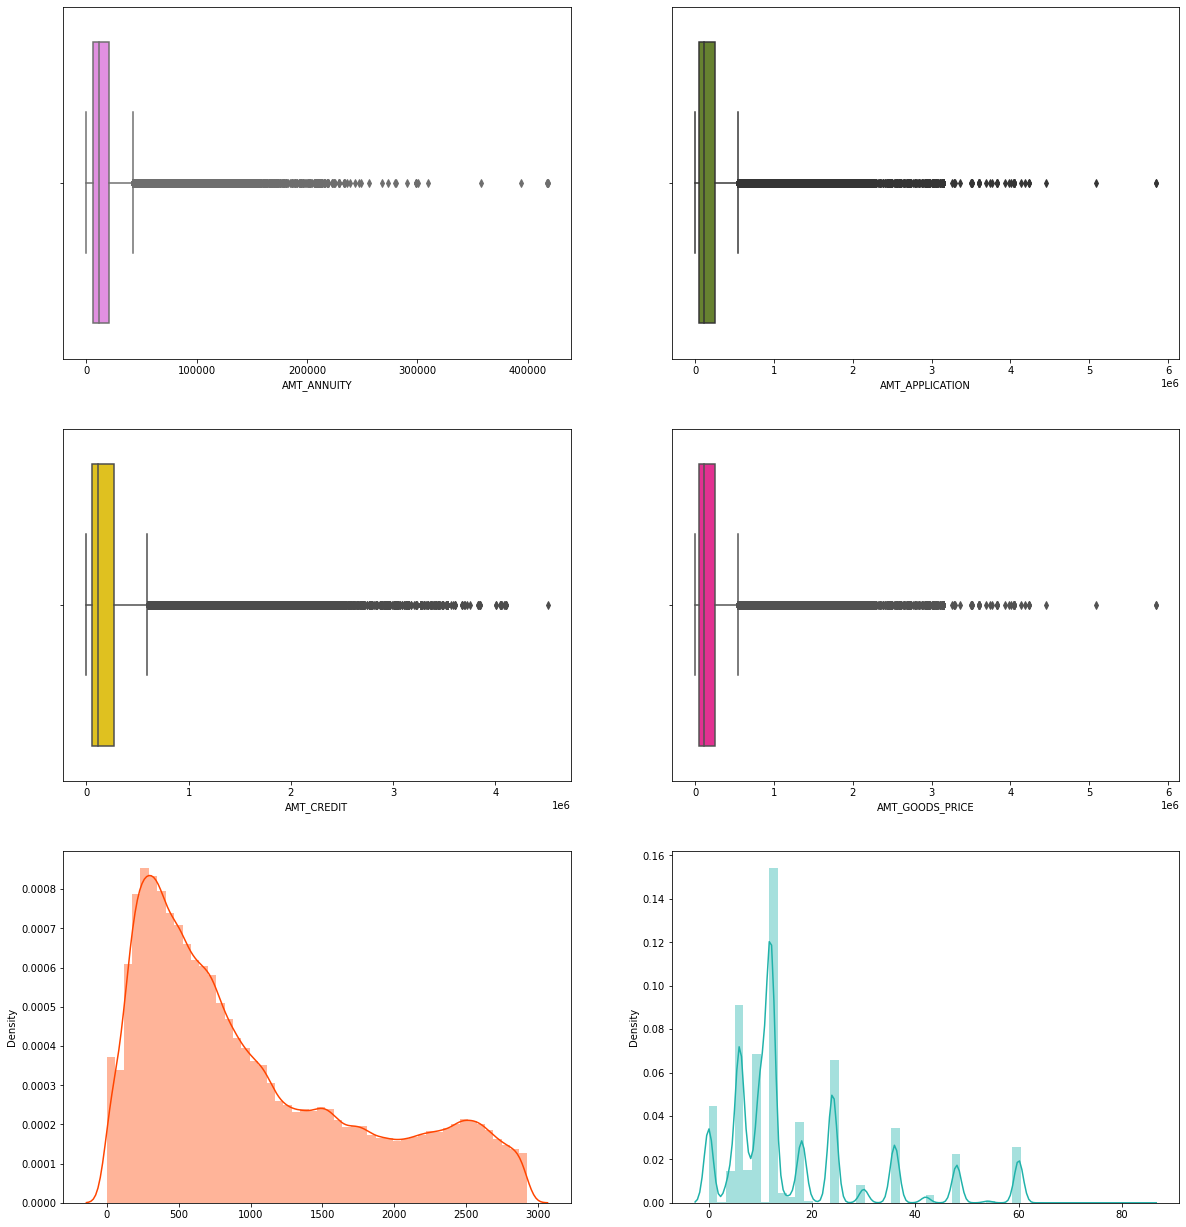

In [38]:
plt.figure(figsize = (30, 25))
plt.subplots_adjust(left=0,
                    bottom=0.05,
                    right=0.6,
                    top=0.9,
                    wspace=0.5,
                    hspace=0.5)

fig, axes = plt.subplots(3, 2, figsize=(20, 22))

sns.boxplot(df.AMT_ANNUITY, color = 'violet',
               ax = axes[0, 0])

sns.boxplot(df.AMT_APPLICATION, color = 'olivedrab',
              ax = axes[0, 1])

sns.boxplot( x = df["AMT_CREDIT"], color = 'gold',
            ax = axes[1, 0])

sns.boxplot(x = df["AMT_GOODS_PRICE"], color = 'deeppink',
            ax = axes[1, 1])

sns.distplot( x =  df.DAYS_DECISION,color = 'orangered', bins = 50,
                 ax = axes[2, 0])


sns.distplot(x = df.CNT_PAYMENT, color = 'lightseagreen', bins = 50,
             ax = axes[2, 1])



plt.show()

In [39]:
df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,Country-wide,12.0,middle
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,Contact center,36.0,low_action
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,301,Cash through the bank,XAP,Repeater,XNA,Cash,Credit and cash offices,12.0,high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,512,Cash through the bank,XAP,Repeater,XNA,Cash,Credit and cash offices,12.0,middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,781,Cash through the bank,HC,Repeater,XNA,Cash,Credit and cash offices,24.0,high


<Figure size 864x504 with 0 Axes>

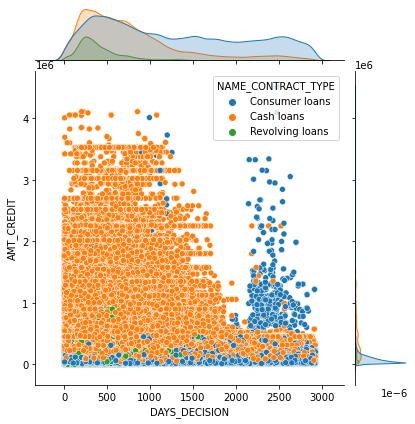

In [40]:
plt.figure(figsize = (12, 7))
sns.jointplot(df.DAYS_DECISION, df.AMT_CREDIT, hue = df.NAME_CONTRACT_TYPE)

plt.show()

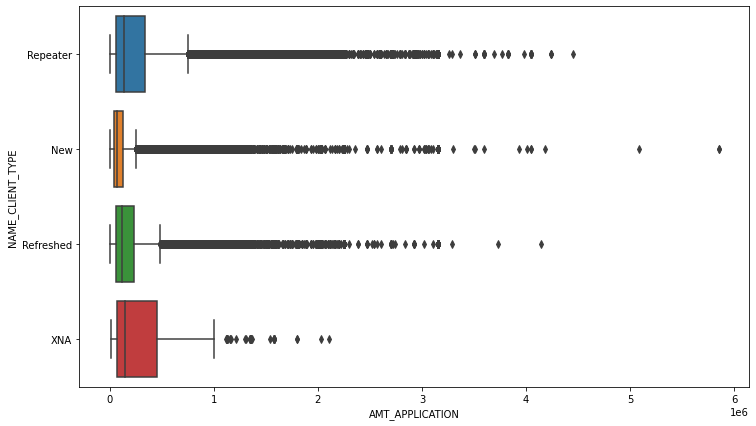

In [41]:
plt.figure(figsize = (12, 7))

sns.boxplot(df.AMT_APPLICATION, df.NAME_CLIENT_TYPE )
plt.show()

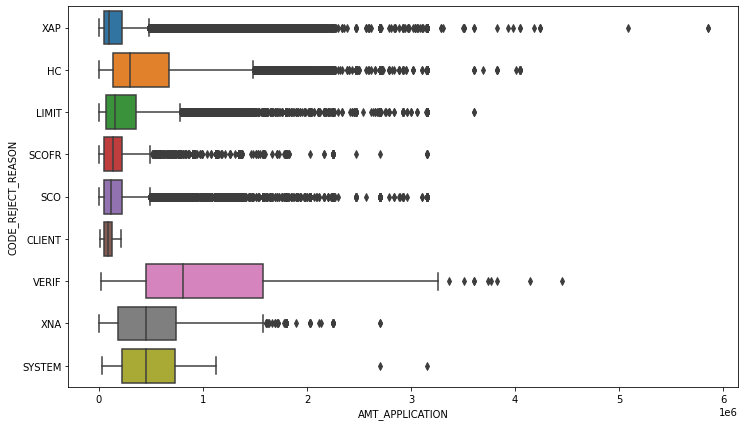

In [42]:
plt.figure(figsize = (12, 7))

sns.boxplot(df.AMT_APPLICATION, df.CODE_REJECT_REASON)
plt.show()



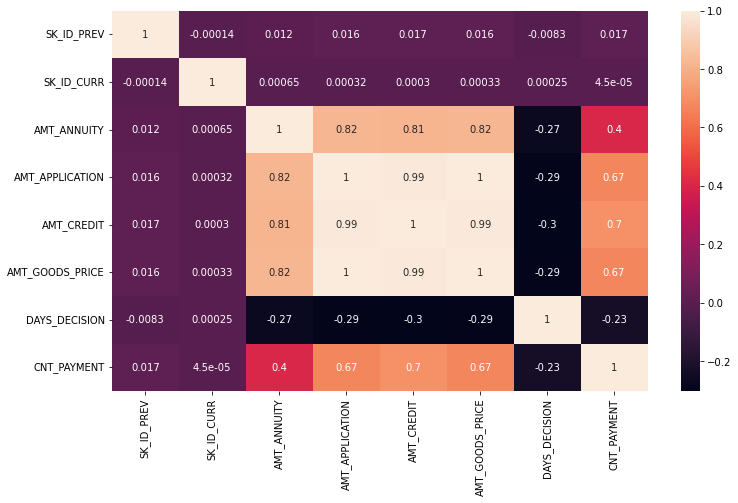

In [44]:
plt.figure(figsize = (12, 7))
sns.heatmap(df.corr(), annot = True)

plt.show()

In [43]:
df.to_csv('prev_appl_df.csv')